In [311]:
from election import *
from voters import *
from parties import *
from scipy.stats import truncnorm, uniform
import matplotlib.pyplot as plt
import math

demographic = {Saint: [[] for i in range(10000)], Spineless:[[] for i in range(500)],
                Opportunist:[[2] for i in range(5000)], Follower:[[4] for i in range(3000)], 
                NonConformist:[[5] for i in range(1000)], Strategist:[[4,4] for i in range(3000)]}

myelection = DHondt(demographic, 10, 150, 10, pdistr='uniform', vdistr='truncnorm', ddim=2)

results = myelection.run()
results[0], results[-1]


(Counter({Party(i, [0.42444151 0.46614052]): 30,
          Party(h, [ 0.37123378 -0.64598282]): 20,
          Party(b, [-0.72469557  0.0298707 ]): 17,
          Party(d, [-0.36371657  0.98775158]): 17,
          Party(g, [ 0.16232354 -0.39836468]): 17,
          Party(f, [-0.28429601 -0.32602956]): 13,
          Party(j, [0.97314137 0.26095391]): 12,
          Party(e, [-0.33815323 -0.71346331]): 11,
          Party(c, [-0.40333306 -0.53897424]): 8,
          Party(a, [-0.99120753  0.02845243]): 5}),
 Counter({Party(i, [0.42444151 0.46614052]): 44,
          Party(b, [-0.72469557  0.0298707 ]): 27,
          Party(h, [ 0.37123378 -0.64598282]): 22,
          Party(g, [ 0.16232354 -0.39836468]): 17,
          Party(d, [-0.36371657  0.98775158]): 8,
          Party(e, [-0.33815323 -0.71346331]): 8,
          Party(f, [-0.28429601 -0.32602956]): 7,
          Party(j, [0.97314137 0.26095391]): 7,
          Party(c, [-0.40333306 -0.53897424]): 6,
          Party(a, [-0.99120753  0.02845243]

In [312]:
# import matplotlib.pyplot as plt
# x1 = stats.truncnorm.rvs(-1.4, 0.6, loc=-0.3,scale=0.5, size=100000)
# x2 = stats.truncnorm.rvs(-0.6,1.4, loc=0.3,scale=0.5, size=100000)

# x = np.concatenate((x1, x2))

# plt.hist(x,bins=100)
# plt.show()

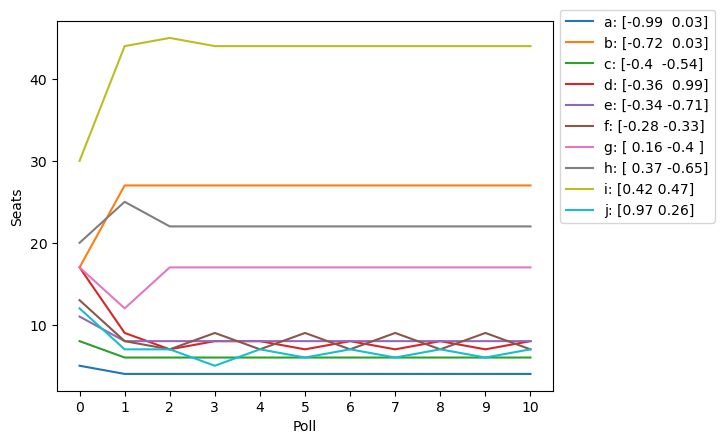

In [313]:
def plot_seats_over_time(results):
    seat_plot = {}
    for result in results:
        for party in result:
            if party.name not in seat_plot:
                seat_plot[party.name]=([result[party]], party.position)
            else:
                seat_plot[party.name][0].append(result[party])
    poll_nrs = range(len(results))
    for p in seat_plot.keys():
        plt.plot(poll_nrs, seat_plot[p][0], label=p+": "+ str(np.round(seat_plot[p][1],2)))
    plt.xlabel("Poll")
    plt.ylabel("Seats")
    plt.xticks(poll_nrs)
    plt.legend(bbox_to_anchor=(1, 1.05))
    plt.show()

plot_seats_over_time(results)
